# Exploratory Data Analysis
## Number of images per age group

In [1]:
import histogram
import apply_algorithm


path = 'Images' # will be changed later once the dataset is ready
# age_histogram code goes here when ready

## Edge concentration per age group

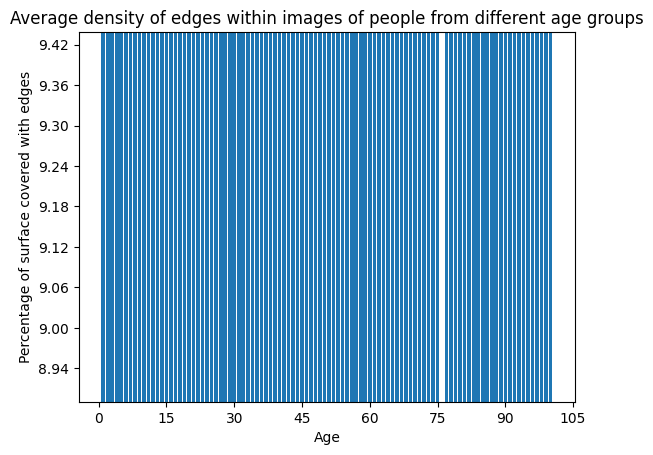

In [2]:
import os
import cv2
from PIL import Image
from numpy import asarray
import numpy


def wrinkles(path):
    if os.path.isdir(path):
        n = len(os.listdir(path))
        arr = [0] * n
        i = 0
        for file in os.listdir(path):
            temp = cv2.cvtColor(asarray(Image.open(os.path.join(path, file))), cv2.COLOR_BGR2GRAY)
            arr[i] = numpy.average(cv2.Canny(cv2.GaussianBlur(src=temp, ksize=(3, 5), sigmaX=0.5), 70, 135))
            i += 1
        return numpy.average(arr) * 100 / 255
    temp = cv2.cvtColor(asarray(Image.open(path)), cv2.COLOR_BGR2GRAY)
    return numpy.average(cv2.Canny(cv2.GaussianBlur(src=temp, ksize=(3, 5), sigmaX=0.5), 70, 135))

data = apply_algorithm.apply(wrinkles, path)
histogram.histogram(data, "Average density of edges within images of people from different age groups", 
                    "Age", "Percentage of surface covered with edges", "edge_histogram.jpg")

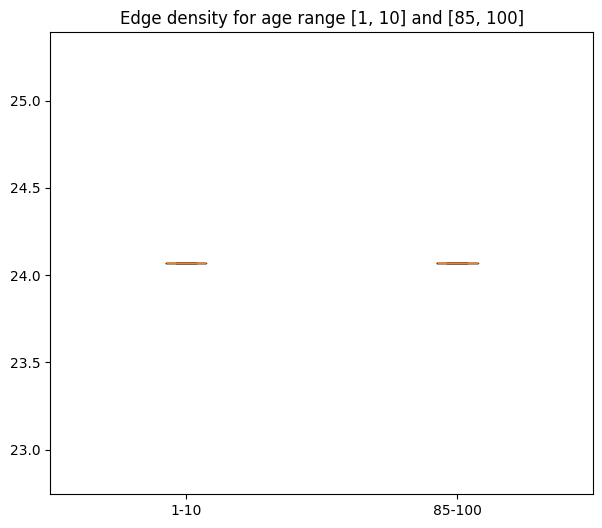

In [3]:
import box


data = apply_algorithm.boxplot_apply(wrinkles, path)
box.boxplot(data, "Edge density of images from age ranges [1, 10] and [85, 100]")

## Average pixel brightness

In [6]:
def average_pixel_color_and_brightness(path):
    def brightness(R,G,B):
        return 0.2126*R + 0.7152*G + 0.0722*B
    
    def single_image(path):
        image=cv2.imread(path)
        average_color_row = numpy.average(image, axis=0)
        average_color = numpy.average(average_color_row, axis=0)
        r=average_color[0]
        g=average_color[1]
        b=average_color[2]
        return [r, g, b]

    if os.path.isdir(path):
        files=os.listdir(path)
        n=len(files)
        average_red=[0]*n
        average_green=[0]*n
        average_blue=[0]*n
        average_brightness=[0]*n
        i=0
        for file in files:
            [r, g, b] = single_image(os.path.join(path, file))
            average_red[i]=r
            average_green[i]=g
            average_blue[i]=b
            average_brightness[i]=brightness(r,g,b)
            i=i+1
        red=numpy.average(average_red)
        green=numpy.average(average_green)
        blue=numpy.average(average_blue)
        brightness=numpy.average(average_brightness)
        return [[red,green,blue],brightness]
    [r, g, b] = single_image(path)
    return [[r, g, b], brightness(r,g,b)]
    


data = apply_algorithm.apply(average_pixel_color_and_brightness, path)
histogram.histogram([i[1] for i in data], "Average brightness of images of people from different age groups",
                    "Age", "Brightness - value between 0 and 255", "brightness_histogram.jpg")

[ WARN:0@522.589] global loadsave.cpp:248 findDecoder imread_('Images/1/test (3rd copy).jpg/test (3rd copy).jpg'): can't open/read file: check file path/integrity


AxisError: axis 0 is out of bounds for array of dimension 0

In [5]:
data = apply_algorithm.boxplot_apply(average_pixel_color_and_brightness, path)
box.boxplot([i[1] for i in data], "Brightness of images from age ranges [1, 10] and [85, 100]")

NotADirectoryError: [Errno 20] Not a directory: 'Images/1/test (3rd copy).jpg'

## Average pixel color

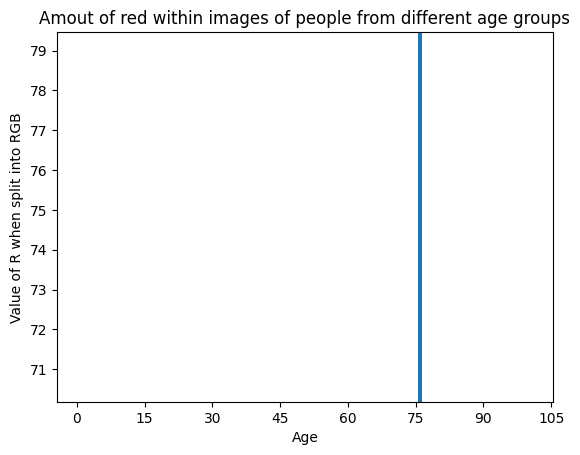

In [9]:
RGB = [i[0] for i in data]
histogram.histogram([i[0] for i in RGB], "Amout of red within images of people from different age groups",
                    "Age", "Value of R when split into RGB", "red_histogram.jpg")

In [ ]:
# boxplot

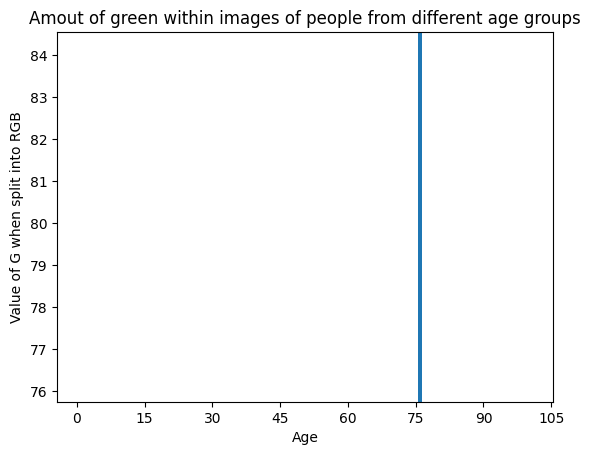

In [10]:
histogram.histogram([i[1] for i in RGB], "Amout of green within images of people from different age groups",
                    "Age", "Value of G when split into RGB", "green_histogram.jpg")

In [ ]:
# boxplot

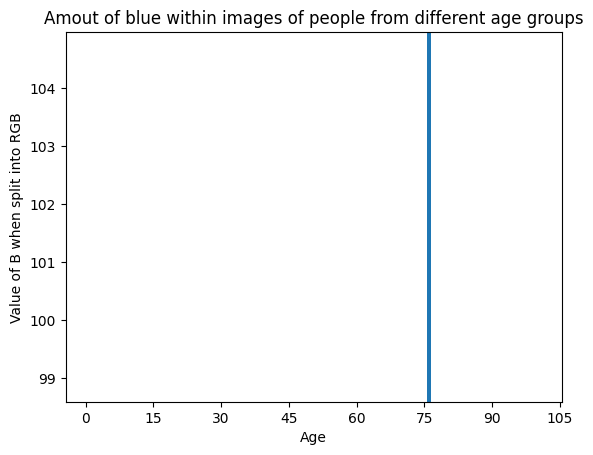

In [11]:
histogram.histogram([i[2] for i in RGB], "Amout of blue within images of people from different age groups", 
                    "Age", "Value of B when split into RGB", "blue_histogram.jpg")

In [ ]:
# boxplot

In [ ]:
# combined colour graph goes here

## Contrast

In [ ]:
# histogram

In [ ]:
# boxplot

## Observations
- observations
- will be
- listed here